# **About the dataset**

This dataset was obtained from the [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) that aims to provide a wide range of insights regarding several world problems.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

In [3]:
data = pd.read_csv("data/owid-co2-data.csv")
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,0.002,NaN,NaN,0.015,0.002,NaN,NaN,NaN,NaN,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,0.011,0.009,NaN,0.021,0.003,NaN,NaN,NaN,NaN,0.099,0.036,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.008,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,0.012,0.009,NaN,0.026,0.003,NaN,NaN,NaN,NaN,0.191,0.061,NaN,NaN,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066,0.008,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,0.012,0.009,NaN,0.032,0.004,NaN,NaN,NaN,NaN,0.282,0.093,NaN,NaN,0.189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060,0.007,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,0.013,0.010,NaN,0.038,0.005,NaN,NaN,NaN,NaN,0.388,0.131,NaN,NaN,0.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068,0.009,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26008 entries, 0 to 26007
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              26008 non-null  object 
 1   year                                 26008 non-null  int64  
 2   iso_code                             21913 non-null  object 
 3   population                           23878 non-null  float64
 4   gdp                                  13479 non-null  float64
 5   cement_co2                           12668 non-null  float64
 6   cement_co2_per_capita                12638 non-null  float64
 7   co2                                  24670 non-null  float64
 8   co2_growth_abs                       24294 non-null  float64
 9   co2_growth_prct                      25696 non-null  float64
 10  co2_per_capita                       24032 non-null  float64
 11  co2_per_gdp                 

In [5]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

No standardization needed on column names.

In [6]:
data.dtypes[data.dtypes != "float64"]

country     object
year         int64
iso_code    object
dtype: object

In [7]:
# Checking missing values
features_dict = dict()
for col in data:
    features_dict.update({col: [data[col].isnull().sum()]})

df_nans = pd.DataFrame.from_dict(features_dict, orient="index").reset_index()
df_nans.rename(columns={"index": "feature", 0: "NaNs"}, inplace=True)
df_nans

,feature,NaNs
0,country,0
1,year,0
2,iso_code,4095
3,population,2130
4,gdp,12529
5,cement_co2,13340
6,cement_co2_per_capita,13370
7,co2,1338
8,co2_growth_abs,1714
9,co2_growth_prct,312


<AxesSubplot:>

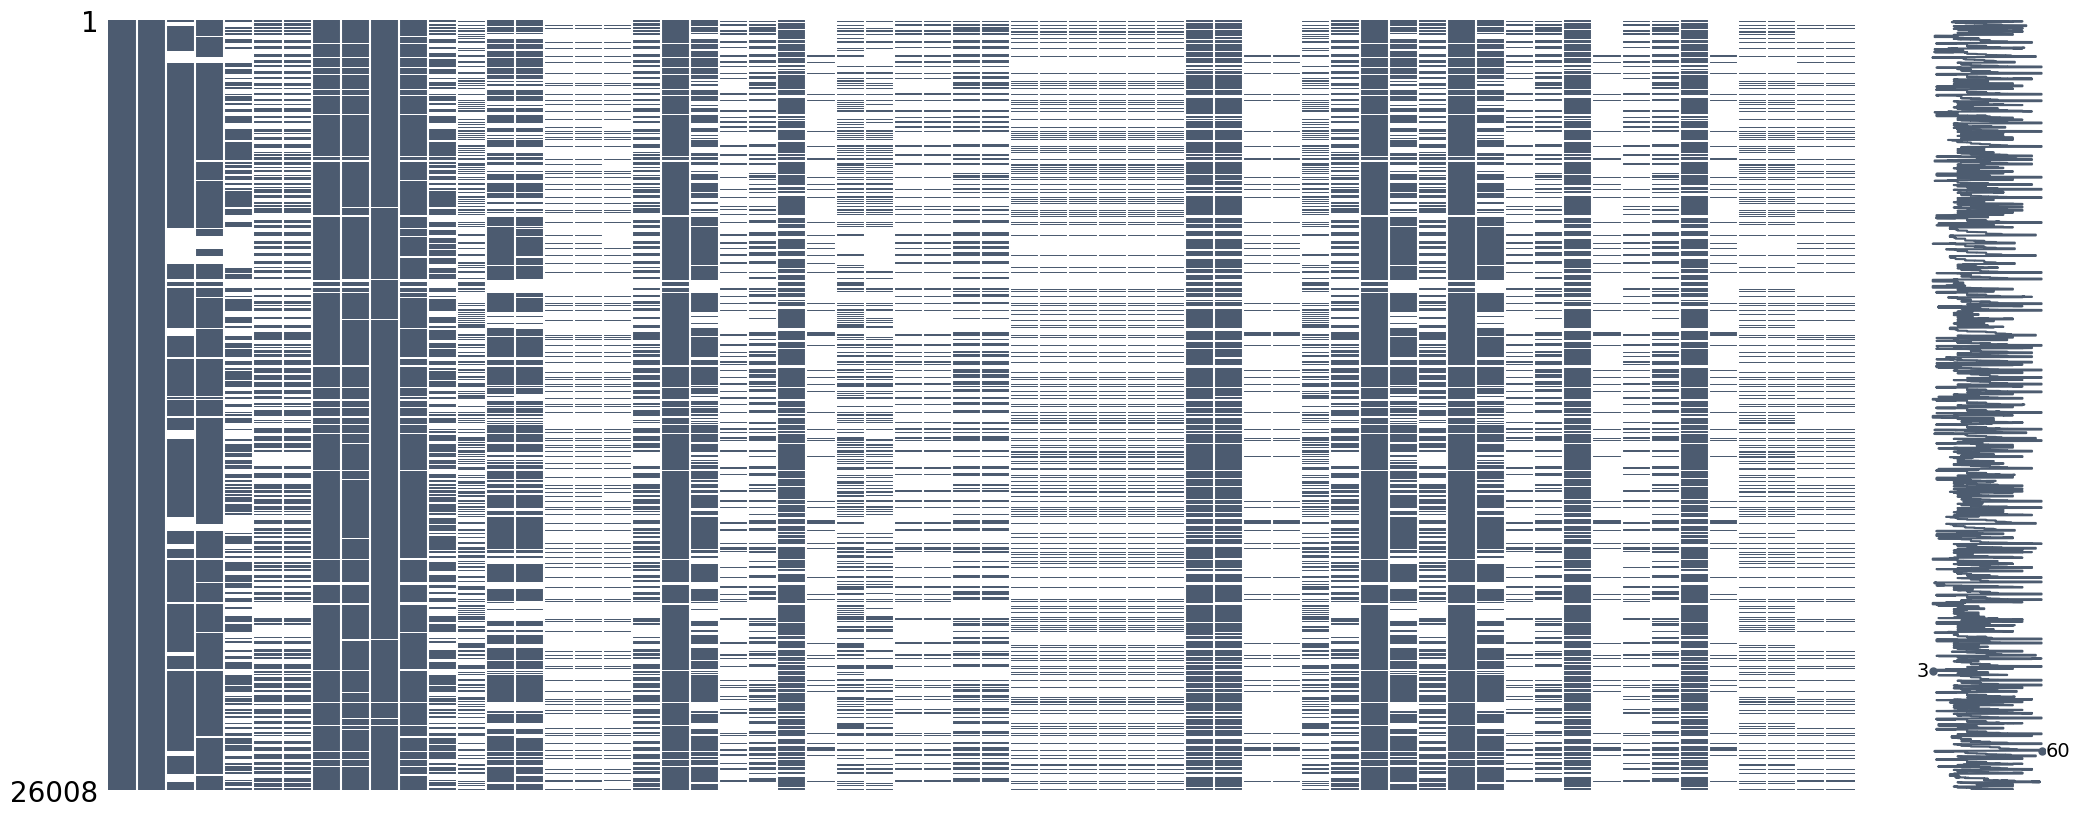

In [8]:
# Visualizing missing values
msno.matrix(data, color=(0.3, 0.36, 0.44))

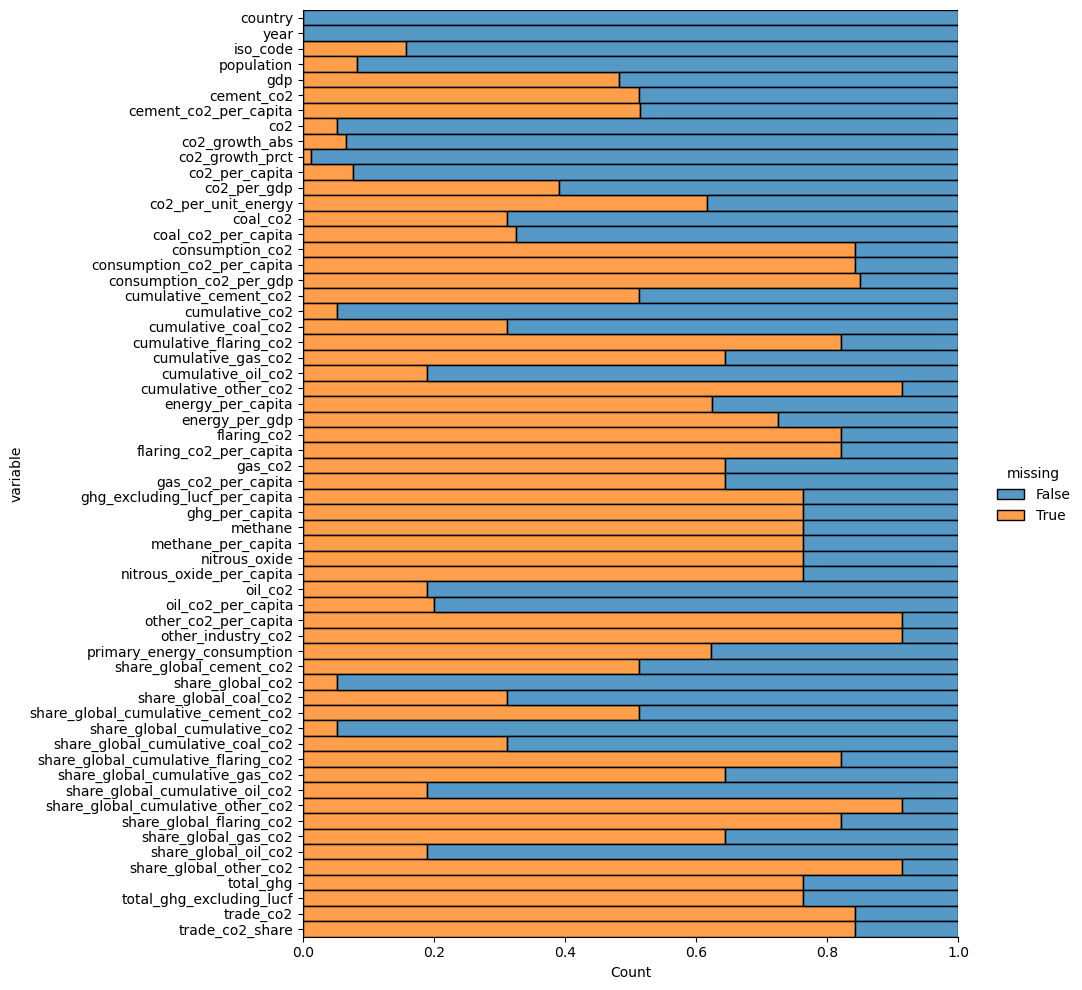

In [17]:
# plt.figure(figsize=(20, 15))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", height=10, aspect=1)
plt.show()

There are many columns practically empty.

**Verificar missing values por país año a año y rellenarlos interpolando!!!**

# **Data Pre-processing**

### **Year column**

In [40]:
print("min year:", data["year"].min())
print("max year:", data["year"].max())

min year: 1750
max year: 2020


In [41]:
data["year"].isnull().sum()

0

No missing values in the year column.

In [42]:
# Removing entries dated before 1900's. Analysis will be made from the beginning of the 20th century.
df = data.copy()
df = df[df["year"] >= 1900]

In [43]:
years = df["year"].unique()
years.sort()
years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### **ISO code column**

In [44]:
df[df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Asia', 'Asia (excl. China & India)', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'French Equatorial Africa', 'French West Africa',
       'High-income countries', 'International transport', 'Kosovo',
       'Kuwaiti Oil Fires', 'Leeward Islands', 'Low-income countries',
       'Lower-middle-income countries', 'North America',
       'North America (excl. USA)', 'Oceania', 'Panama Canal Zone',
       'Ryukyu Islands', 'South America', 'St. Kitts-Nevis-Anguilla',
       'Upper-middle-income countries', 'World'], dtype=object)

There are some countries not too relevant for the purposes of this project. Their data will be erased for simplification.

In [45]:
non_iso_countries = [
    'French Equatorial Africa',
    'French West Africa',
    'Kosovo',
    'Kuwaiti Oil Fires',
    'Leeward Islands',
    'Panama Canal Zone',
    'Ryukyu Islands',
    'St. Kitts-Nevis-Anguilla',
    'Bonaire Sint Eustatius and Saba',
    'Christmas Island',
    'Sint Maarten (Dutch part)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'European Union (27)',
    'European Union (28)',
    'International transport',
    'High-income countries',
    'Upper-middle-income countries',
    'Lower-middle-income countries',
    'Low-income countries'
]

# Checking the amount of CO2 emitted for each country with no ISO code assigned.
for country in non_iso_countries:
    co2 = df[(df["country"] == country) & ~(df["co2"].isnull())]["co2"].sum()
    print(f"CO2 Emssions: {country} = {np.round(co2, 3)}")

CO2 Emssions: French Equatorial Africa = 2.659
CO2 Emssions: French West Africa = 9.765
CO2 Emssions: Kosovo = 105.637
CO2 Emssions: Kuwaiti Oil Fires = 477.925
CO2 Emssions: Leeward Islands = 0.179
CO2 Emssions: Panama Canal Zone = 14.762
CO2 Emssions: Ryukyu Islands = 20.892
CO2 Emssions: St. Kitts-Nevis-Anguilla = 0.624
CO2 Emssions: Bonaire Sint Eustatius and Saba = 30.353
CO2 Emssions: Christmas Island = 1.333
CO2 Emssions: Sint Maarten (Dutch part) = 67.709
CO2 Emssions: Europe (excl. EU-27) = 223970.264
CO2 Emssions: Europe (excl. EU-28) = 162132.889
CO2 Emssions: European Union (27) = 275132.161
CO2 Emssions: European Union (28) = 336969.522
CO2 Emssions: International transport = 42242.538
CO2 Emssions: High-income countries = 924116.46
CO2 Emssions: Upper-middle-income countries = 503682.247
CO2 Emssions: Lower-middle-income countries = 165194.601
CO2 Emssions: Low-income countries = 9669.65


In [46]:
# Dropping the countries
for country in non_iso_countries:
    value = df[df["country"] == country].index
    df.drop(labels=value, axis=0, inplace=True)

In [47]:
# Verifying countries were dropped
df[df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Asia', 'Asia (excl. China & India)', 'Europe',
       'North America', 'North America (excl. USA)', 'Oceania',
       'South America', 'World'], dtype=object)

Removing non-relevant columns

In [ ]:
subset = [
    'ghg_excluding_lucf_per_capita',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]
df.drop(columns=subset, axis=1, inplace=True)
df.columns

### **Population column**

In [48]:
df["population"].isnull().sum()

356

In [49]:
# Countries with no population, gdp and co2 emissions info
df[(df["population"].isnull()) & (df["gdp"].isnull()) & (df["co2"].isnull())]["country"].unique()

array(['Antarctica', 'Aruba', 'Curacao', 'Puerto Rico'], dtype=object)

In [50]:
# Dropping rows of countries without population, GDP and CO2 emissions info.
values = df[(df["population"].isnull()) & (df["gdp"].isnull()) & (df["co2"].isnull())].index
df.drop(labels=values, axis=0, inplace=True)

In [51]:
df[df["population"].isnull()]["country"].unique()

array(['Antarctica', 'Aruba', 'Asia (excl. China & India)', 'Curacao',
       'North America (excl. USA)'], dtype=object)

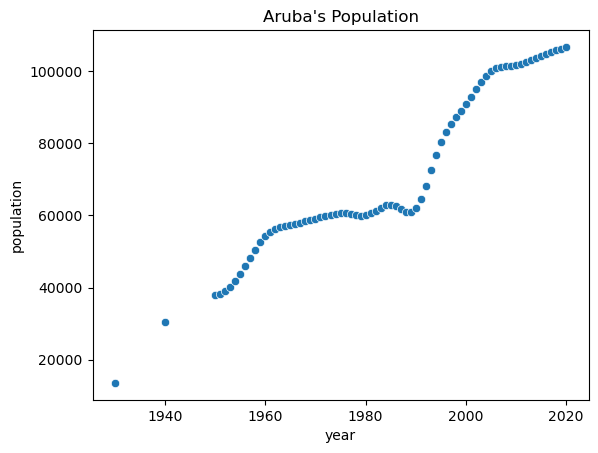

In [52]:
sns.scatterplot(df[df["country"] == "Aruba"], x="year", y="population")
plt.title("Aruba's Population")
plt.show()